# Dynamic Time Warping (DTW) 

 Dynamic Time Warping (DTW) is a powerful algorithm used to measure similarity between two time series that may vary in speed. Unlike Euclidean distance, which requires the series to be of the same length and aligned in time, DTW allows for elastic shifts in the time dimension, making it ideal for comparing time series with temporal distortions.

### Applications
* Speech Recognition: Matching speech patterns despite variations in speed.
* Gesture Recognition: Comparing motion sequences in different speeds or styles.
* Finance: Analyzing stock price movements that may vary in time scale.
* Bioinformatics: Comparing biological sequences.

### Mathematical Explanation


### 1. Distance Matrix

Given two sequences $ Q = [q_1, q_2, \ldots, q_n] $ and $ C = [c_1, c_2, \ldots, c_m] $, where $ n $ and $ m $ are their lengths, we start by computing the distance matrix $ D $:

$
D[i, j] = \|q_i - c_j\|^2
$

Each element $ D[i, j] $ represents the squared distance between the $ i $-th element of $ Q $ and the $ j $-th element of $ C $.

### 2. Accumulated Cost Matrix

The accumulated cost matrix $ D' $ helps in finding the optimal alignment path. The element $ D'[i, j] $ represents the minimum cumulative cost to reach the cell $ (i, j) $:

$
D'[i, j] = D[i, j] + \min \begin{cases}
D'[i-1, j], \\
D'[i, j-1], \\
D'[i-1, j-1]
\end{cases}
$

The base cases are defined as:

$
D'[0, 0] = D[0, 0]
$

$
D'[i, 0] = D[i, 0] + D'[i-1, 0] \quad \text{for} \quad i > 0
$

$
D'[0, j] = D[0, j] + D'[0, j-1] \quad \text{for} \quad j > 0
$

### 3. Optimal Path

To find the optimal path, we start from $ D'[n-1, m-1] $ and trace back to $ D'[0, 0] $, moving in the direction of minimum cumulative cost:

$
\text{path} = \{(i, j) \mid \text{while} \; i > 0 \; \text{and} \; j > 0 \}
$

$
\begin{cases}
(i-1, j) \quad \text{if} \quad D'[i-1, j] = \min \{D'[i-1, j], D'[i, j-1], D'[i-1, j-1]\} \\
(i, j-1) \quad \text{if} \quad D'[i, j-1] = \min \{D'[i-1, j], D'[i, j-1], D'[i-1, j-1]\} \\
(i-1, j-1) \quad \text{if} \quad D'[i-1, j-1] = \min \{D'[i-1, j], D'[i, j-1], D'[i-1, j-1]\}
\end{cases}
$

This path minimizes the total distance between the sequences by allowing for shifts in the time dimension.

### Example

Consider the sequences:

$
Q = [1, 3, 4, 9]
$

$
C = [1, 3, 7, 8, 9]
$

### Step-by-Step Calculation

1. **Compute the Distance Matrix $ D $**

$
D = \begin{bmatrix}
0 & 4 & 36 & 49 & 64 \\
4 & 0 & 16 & 25 & 36 \\
9 & 1 & 9 & 16 & 25 \\
64 & 36 & 4 & 1 & 0 \\
\end{bmatrix}
$

2. **Compute the Accumulated Cost Matrix $ D' $**

$
D' = \begin{bmatrix}
0 & 4 & 40 & 89 & 153 \\
4 & 0 & 16 & 41 & 77 \\
13 & 1 & 10 & 26 & 51 \\
77 & 37 & 14 & 11 & 11 \\
\end{bmatrix}
$

3. **Find the Optimal Path**

The optimal path is traced as follows:

$
\text{Start at} \; D'[3, 4] \rightarrow D'[2, 3] \rightarrow D'[1, 2] \rightarrow D'[0, 1] \rightarrow D'[0, 0]
$

So, the optimal path is:

$
[(0, 0), (0, 1), (1, 2), (2, 3), (3, 4)]
$

This path aligns the sequences by stretching $ Q $ to match $ C $ effectively.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

def compute_dtw(Q, C):
    n, m = len(Q), len(C)
    D = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            D[i, j] = euclidean_distance(Q[i], C[j])
    
    D_prime = np.zeros((n, m))
    D_prime[0, 0] = D[0, 0]
    for i in range(1, n):
        D_prime[i, 0] = D[i, 0] + D_prime[i-1, 0]
    for j in range(1, m):
        D_prime[0, j] = D[0, j] + D_prime[0, j-1]
    
    for i in range(1, n):
        for j in range(1, m):
            D_prime[i, j] = D[i, j] + min(D_prime[i-1, j], D_prime[i, j-1], D_prime[i-1, j-1])
    
    path = [(n-1, m-1)]
    i, j = n-1, m-1
    while i > 0 and j > 0:
        if i == 0:
            j -= 1
        elif j == 0:
            i -= 1
        else:
            steps = [D_prime[i-1, j], D_prime[i, j-1], D_prime[i-1, j-1]]
            min_step = np.argmin(steps)
            if min_step == 0:
                i -= 1
            elif min_step == 1:
                j -= 1
            else:
                i -= 1
                j -= 1
        path.append((i, j))
    
    path = path[::-1]
    return D, D_prime, path

In [33]:
# Example sequences
Q = np.array([1, 2, 3, 4, 2])
C = np.array([1, 1, 2, 3, 2, 2, 4])

D, D_prime, path = compute_dtw(Q, C)

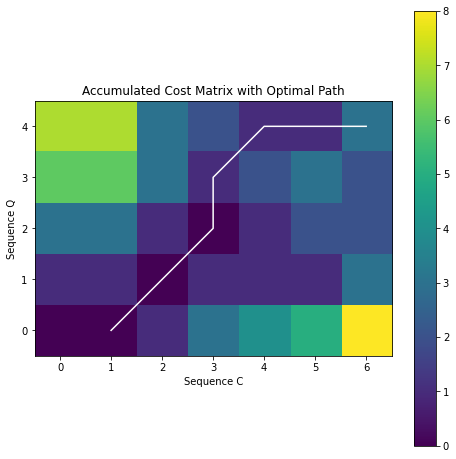

In [34]:
# Plotting the distance matrix and the optimal path
plt.figure(figsize=(8, 8))
plt.imshow(D_prime, origin='lower', cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.plot([j for i, j in path], [i for i, j in path], 'w')
plt.title('Accumulated Cost Matrix with Optimal Path')
plt.xlabel('Sequence C')
plt.ylabel('Sequence Q')
plt.show()

### Comparison with Euclidean Distance

In [35]:
# Create two sequences
x = [3, 1, 2, 2, 1]
y = [2, 0, 0, 3, 3, 1, 0]

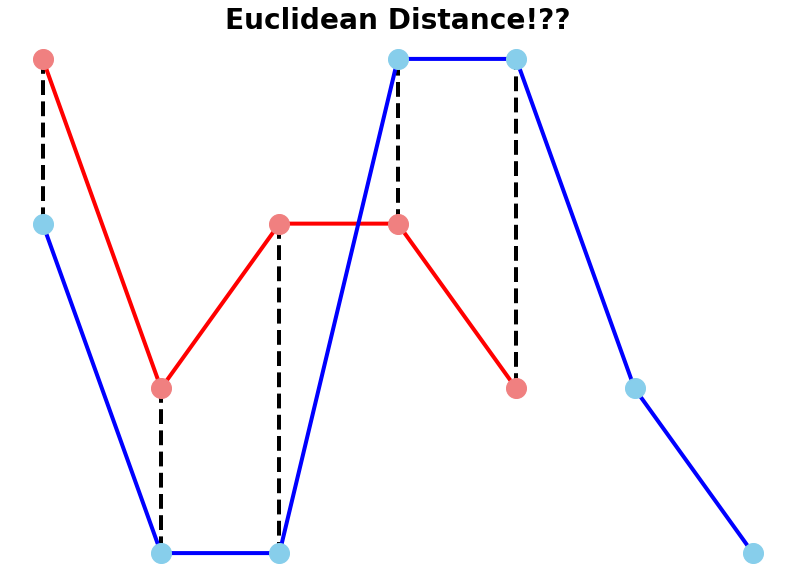

In [36]:
fig, ax = plt.subplots(figsize=(14, 10))

# Remove the border and axes ticks
fig.patch.set_visible(False)
ax.axis('off')

xx = [(i, x[i]) for i in np.arange(0, len(x))]
yy = [(j, y[j]) for j in np.arange(0, len(y))]

for i, j in zip(xx, yy[:-2]):
    ax.plot([i[0], j[0]], [i[1], j[1]], '--k', linewidth=4)

ax.plot(x, '-ro', label='x', linewidth=4, markersize=20, markerfacecolor='lightcoral', markeredgecolor='lightcoral')
ax.plot(y, '-bo', label='y', linewidth=4, markersize=20, markerfacecolor='skyblue', markeredgecolor='skyblue')
ax.set_title("Euclidean Distance!??", fontsize=28, fontweight="bold")
plt.show()

In [37]:
def compute_euclidean_distance_matrix(x, y) -> np.array:
    """Calculate distance matrix
    This method calcualtes the pairwise Euclidean distance between two sequences.
    The sequences can have different lengths.
    """
    dist = np.zeros((len(y), len(x)))
    for i in range(len(y)):
        for j in range(len(x)):
            dist[i,j] = (x[j]-y[i])**2
    return dist

In [38]:
def compute_accumulated_cost_matrix(x, y) -> np.array:
    """Compute accumulated cost matrix for warp path using Euclidean distance
    """
    distances = compute_euclidean_distance_matrix(x, y)

    # Initialization
    cost = np.zeros((len(y), len(x)))
    cost[0,0] = distances[0,0]
    
    for i in range(1, len(y)):
        cost[i, 0] = distances[i, 0] + cost[i-1, 0]  
        
    for j in range(1, len(x)):
        cost[0, j] = distances[0, j] + cost[0, j-1]  

    # Accumulated warp path cost
    for i in range(1, len(y)):
        for j in range(1, len(x)):
            cost[i, j] = min(
                cost[i-1, j],    # insertion
                cost[i, j-1],    # deletion
                cost[i-1, j-1]   # match
            ) + distances[i, j] 
            
    return cost

In [39]:
dtw_distance, warp_path = fastdtw(x, y, dist=euclidean) 

In [40]:
cost_matrix = compute_accumulated_cost_matrix(x, y)

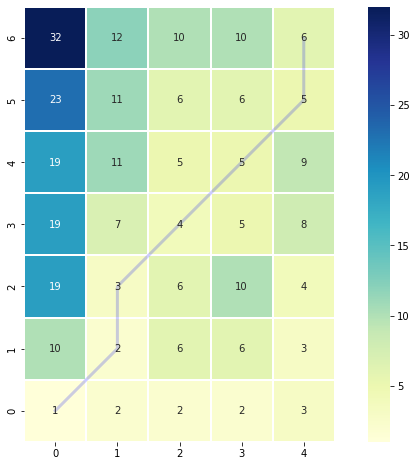

In [41]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cost_matrix, annot=True, square=True, linewidths=0.1, cmap="YlGnBu", ax=ax)
ax.invert_yaxis()

# Get the warp path in x and y directions
path_x = [p[0] for p in warp_path]
path_y = [p[1] for p in warp_path]

# Align the path from the center of each cell
path_xx = [x+0.5 for x in path_x]
path_yy = [y+0.5 for y in path_y]

ax.plot(path_xx, path_yy, color='blue', linewidth=3, alpha=0.2)
plt.show()

The color bar shows the cost of each point in the grid. As can be seen, the warp path (blue line) is going through the lowest cost on the grid. Let's see the DTW distance and the warping path by printing these two variables.

In [42]:
print("DTW distance: ", dtw_distance)
print("Warp path: ", warp_path)

DTW distance:  6.0
Warp path:  [(0, 0), (1, 1), (1, 2), (2, 3), (3, 4), (4, 5), (4, 6)]


The warping path starts at point (0, 0) and ends at (4, 6) by 6 moves. Let's also calculate the accumulated cost most using the functions we defined earlier and compare the values with the heatmap.

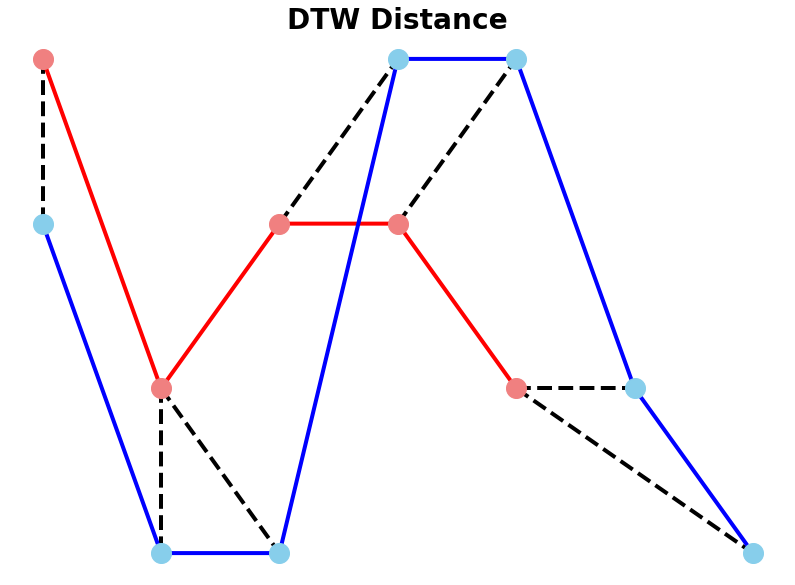

In [43]:
fig, ax = plt.subplots(figsize=(14, 10))

# Remove the border and axes ticks
fig.patch.set_visible(False)
ax.axis('off')

for [map_x, map_y] in warp_path:
    ax.plot([map_x, map_y], [x[map_x], y[map_y]], '--k', linewidth=4)

ax.plot(x, '-ro', label='x', linewidth=4, markersize=20, markerfacecolor='lightcoral', markeredgecolor='lightcoral')
ax.plot(y, '-bo', label='y', linewidth=4, markersize=20, markerfacecolor='skyblue', markeredgecolor='skyblue')
ax.set_title("DTW Distance", fontsize=28, fontweight="bold")

plt.show()

* Euclidean Distance: Compares points directly across time, potentially missing temporal shifts.
* DTW Path: Adjusts for time shifts, finding a more natural alignment.

Dynamic Time Warping is a powerful tool for comparing time series with variations in time. It finds a more natural alignment than Euclidean distance by allowing elastic shifts in the time axis. The examples and visualizations provided show how DTW can align sequences more effectively than simple point-to-point comparison.

# Dynamic Time Warping (DTW) for Clustering

Clustering time series data is challenging due to the potential differences in temporal alignment. DTW is particularly useful for clustering because it can handle time shifts and distortions, providing a more flexible and accurate measure of similarity.

### Why DTW in Clustering?
* Time Variability: Time series can have variations in the time axis (e.g., different speeds), which DTW handles effectively.
* Robustness: DTW aligns time series based on shape and structure, making it robust to time distortions.
* Applications: DTW clustering is useful in areas like speech recognition, anomaly detection in sensor networks, and financial time series analysis.

In [44]:
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

def dtw_distance(ts_a, ts_b):
    distance, path = fastdtw(ts_a, ts_b, dist=euclidean)
    return distance

### K-Means Clustering with DTW

In this example, we perform k-means clustering on time series data using Dynamic Time Warping (DTW) as the distance measure. Traditional k-means clustering uses Euclidean distance, which may not be suitable for time series data due to potential temporal misalignments. DTW addresses this by allowing elastic shifts in the time dimension to find an optimal alignment between time series.

We perform k-means clustering on this data using DTW to measure distances. The algorithm initializes cluster centers using Euclidean k-means and then refines them iteratively based on DTW distances.

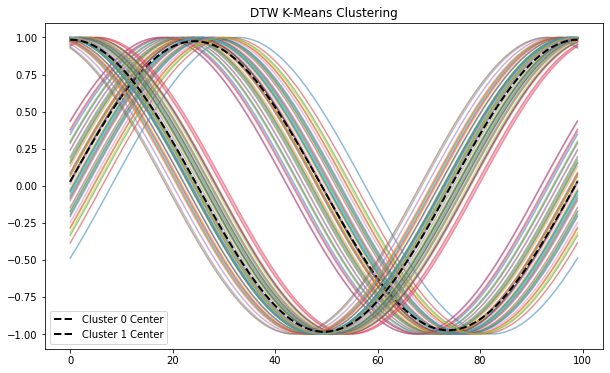

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw


def dtw_k_means(X, n_clusters, max_iter=10):
    # Initialize cluster centers using Euclidean distance
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    centers = kmeans.cluster_centers_
    
    for iteration in range(max_iter):
        labels = np.zeros(len(X), dtype=int)
        for i, x in enumerate(X):
            distances = [dtw_distance(x, center) for center in centers]
            labels[i] = np.argmin(distances)
        
        new_centers = []
        for k in range(n_clusters):
            cluster_points = np.array([X[i] for i in range(len(X)) if labels[i] == k])
            if len(cluster_points) > 0:
                new_center = np.mean(cluster_points, axis=0)
            else:
                new_center = centers[k]  # If no points in cluster, keep the old center
            new_centers.append(new_center)
        centers = np.array(new_centers)
    
    return np.array(centers), labels

# Generate synthetic dataset
np.random.seed(0)
data = [np.sin(np.linspace(0, 2 * np.pi, 100) + np.random.randn() * 0.2) for _ in range(50)]
data.extend([np.cos(np.linspace(0, 2 * np.pi, 100) + np.random.randn() * 0.2) for _ in range(50)])
data = np.array(data)

# Apply DTW k-means
centers, labels = dtw_k_means(data, n_clusters=2)

# Plot clusters
plt.figure(figsize=(10, 6))
for label in np.unique(labels):
    cluster_data = data[labels == label]
    for series in cluster_data:
        plt.plot(series, alpha=0.5)
    plt.plot(centers[label], 'k--', lw=2, label=f'Cluster {label} Center')
plt.title('DTW K-Means Clustering')
plt.legend()
plt.show()

* Colored Lines: Each line represents a time series from the dataset. The color indicates its assigned cluster.
* Dashed Lines: These are the cluster centers. They represent the mean pattern of the time series in each cluster.

The plot shows two distinct clusters. The sine waves are grouped in one cluster (Cluster 0), and the cosine waves are grouped in another (Cluster 1). The DTW distance measure allows for flexible alignment, making it effective at grouping similar time series even with variations in time.

### Hierarchical Clustering with DTW

C:\Users\user\AppData\Local\Temp\ipykernel_11972\3178768157.py:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(dist_matrix, method='average')


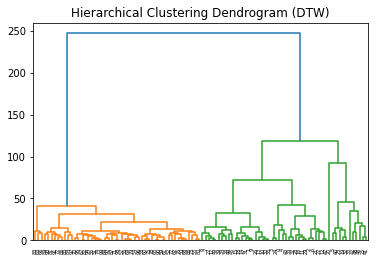

In [46]:
from scipy.cluster.hierarchy import linkage, dendrogram

def hierarchical_clustering_dtw(data):
    # Compute the distance matrix
    dist_matrix = np.zeros((len(data), len(data)))
    for i in range(len(data)):
        for j in range(i + 1, len(data)):
            dist_matrix[i, j] = dtw_distance(data[i], data[j])
            dist_matrix[j, i] = dist_matrix[i, j]
    
    # Perform hierarchical clustering
    linked = linkage(dist_matrix, method='average')
    dendrogram(linked)
    plt.title('Hierarchical Clustering Dendrogram (DTW)')
    plt.show()

# Apply hierarchical clustering
hierarchical_clustering_dtw(data)

* Dynamic Time Warping is a versatile tool for clustering time series data. By aligning sequences based on their shape, DTW provides a more meaningful measure of similarity compared to Euclidean distance, especially when dealing with temporal distortions. This notebook demonstrated DTW's effectiveness through various examples